<a href="https://colab.research.google.com/github/urness/CS167Fall22Code/blob/main/Day07_Notes_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example code from CS 167 on September 20, 2022


# Graphs! 
Let's take a look at how to plot data in a iPython Notebook:

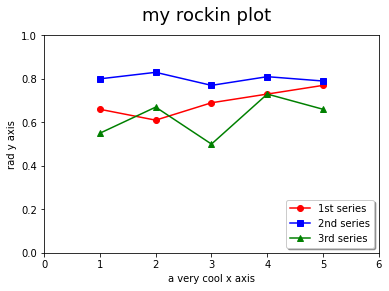

In [ ]:
import matplotlib.pyplot as plt

#lets start by making up some data
xvals = [1,2,3,4,5]
series1 = [.66,.61,.69,.73,.77]
series2 = [.8,.83,.77,.81,.79]
series3 = [.55,.67,.5,.73,.66]

#add names for the graph and axes
plt.suptitle('my rockin plot',fontsize=18)
plt.xlabel('a very cool x axis')
plt.ylabel('rad y axis')

#and plot our series
plt.plot(xvals,series1,'ro-',label='1st series')
plt.plot(xvals,series2,'bs-',label='2nd series')
plt.plot(xvals,series3,'g^-',label='3rd series')

# add a key and set the values for your axis (plt.axis[x_min, x_max, y_min, y_max])
plt.legend(loc='lower right', shadow=True)
plt.axis([0, 6, 0, 1]) ## 0 to 6 in x-dimension; 0 to 1 in y-dimension
plt.show()

In [ ]:
#Now, let's plot something about our data.
import pandas
import numpy
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#load in the data
spotify_data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/spotify_top_charts.csv') #change this line to point to your data

#work with a subset of the data
subset = spotify_data[['artist_names','track_name','peak_rank']]
spotify_subset = subset.dropna(subset=['peak_rank'])
spotify_subset.head()


,artist_names,track_name,peak_rank
0,Glass Animals,Heat Waves,1.0
1,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1.0
2,Anitta,Envolver,3.0
3,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3.0
4,GAYLE,abcdefu,1.0


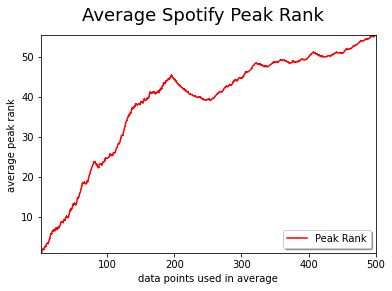

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# a silly function that returns the average peak_rank for the first k tracks in the dataframe
def getAveragePeakRank(data,k):
    return data["peak_rank"].iloc[0:k].mean()

number_of_points = 500

# populate the list
ranks_list = []
for i in range(1,number_of_points):
    val = getAveragePeakRank(spotify_subset,i)
    ranks_list.append(val)

# plot it!
xvals = range(1,number_of_points)
plt.suptitle('Average Spotify Peak Rank',fontsize=18)
plt.xlabel('data points used in average')
plt.ylabel('average peak rank')
plt.plot(xvals,ranks_list,'r,-',label='Peak Rank')
plt.legend(loc='lower right', shadow=True)
ymin = min(ranks_list)
ymax = max(ranks_list)
plt.axis([1, number_of_points, ymin, ymax])
plt.show()

# Exercise #1


In [ ]:
# exercise #1:




# Metrics and Testing
Let's use the iris dataset and see how accurate our kNN model is.

In [ ]:
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv') #change this line to point to your data
#shuffle the data - "sampling" the full set in random order
shuffled_data = data.sample(frac=1, random_state=41)
#use the first 20 rows in the shuffled set as testing data #train with the rest
test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]

In [ ]:
def classify_kNN(new_example,train_data,k):
    #getting a copy of the training set just so we don't
    #mess up the original
    train_data_copy = train_data.copy()
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['petal length']-train_data_copy['petal length'])**2
        +(new_example['sepal length']-train_data_copy['sepal length'])**2
        +(new_example['petal width']-train_data_copy['petal width'])**2
        +(new_example['sepal width']-train_data_copy['sepal width'])**2)
    
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #mode to get most common thing in the first k examples in the sorted dataframe
    #iloc to get the actual string, mode will return the string inside of a pandas Series
    prediction = sorted_data.iloc[0:k]['species'].mode().iloc[0] 
    return prediction

In [ ]:
def accuracy(actual,predicted):
    #return the percentage of predicted/actual that match
    num_correct = 0
    for i in range(len(actual)):
      if actual.iloc[i] == predicted.iloc[i]:
        num_correct +=1
    frac_correct = num_correct/len(actual)
    return frac_correct

In [ ]:
def classify_all_kNN(test_data,train_data,k):
    #apply the classify_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    print("Exercise #2 --- YOUR CODE HERE")
    results = []
    for i in range(len(test_data)):
      res = classify_kNN(test_data.iloc[i], train_data,k)
      results.append(res)
    return pandas.Series(results)
    


In [ ]:
predictions5NN = classify_all_kNN(test_data,train_data,5)
print('ACTUAL\t\tPREDICTIONS')
for i in range(20):
    print(test_data['species'].iloc[i], "  ", predictions5NN.iloc[i] )

acc = accuracy(test_data['species'],predictions5NN)
print("accuracy:", acc)

Exercise #2 --- YOUR CODE HERE
ACTUAL		PREDICTIONS
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-versicolor    Iris-versicolor
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-virginica    Iris-virginica
Iris-setosa    Iris-setosa
Iris-setosa    Iris-setosa
Iris-versicolor    Iris-versicolor
Iris-setosa    Iris-setosa
Iris-virginica    Iris-versicolor
Iris-setosa    Iris-setosa
Iris-versicolor    Iris-virginica
Iris-setosa    Iris-setosa
Iris-setosa    Iris-setosa
accuracy: 0.9


Exercise #2 --- YOUR CODE HERE
Exercise #2 --- YOUR CODE HERE
Exercise #2 --- YOUR CODE HERE


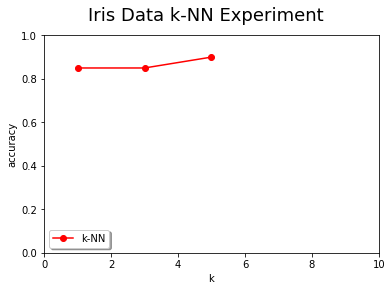

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#reload the data
data = pandas.read_csv('/content/drive/MyDrive/CS167Fall22/Datasets/irisData.csv')

shuffled_data = data.sample(frac=1, random_state = 41)

test_data = shuffled_data.iloc[0:20]
train_data = shuffled_data.iloc[20:]


k_vals = [1,3,5]
kNN_accuracies = []

for k in k_vals:
    predictions = classify_all_kNN(test_data,train_data,k)
    current_accuracy = accuracy(test_data['species'],predictions)
    kNN_accuracies.append(current_accuracy)


plt.suptitle('Iris Data k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(k_vals,kNN_accuracies,'ro-',label='k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,10,0,1])

plt.show()

In [ ]:
# exercise #3:
# add more points: add multiple values of k to the graph 
# explain the phenomenon that you observe